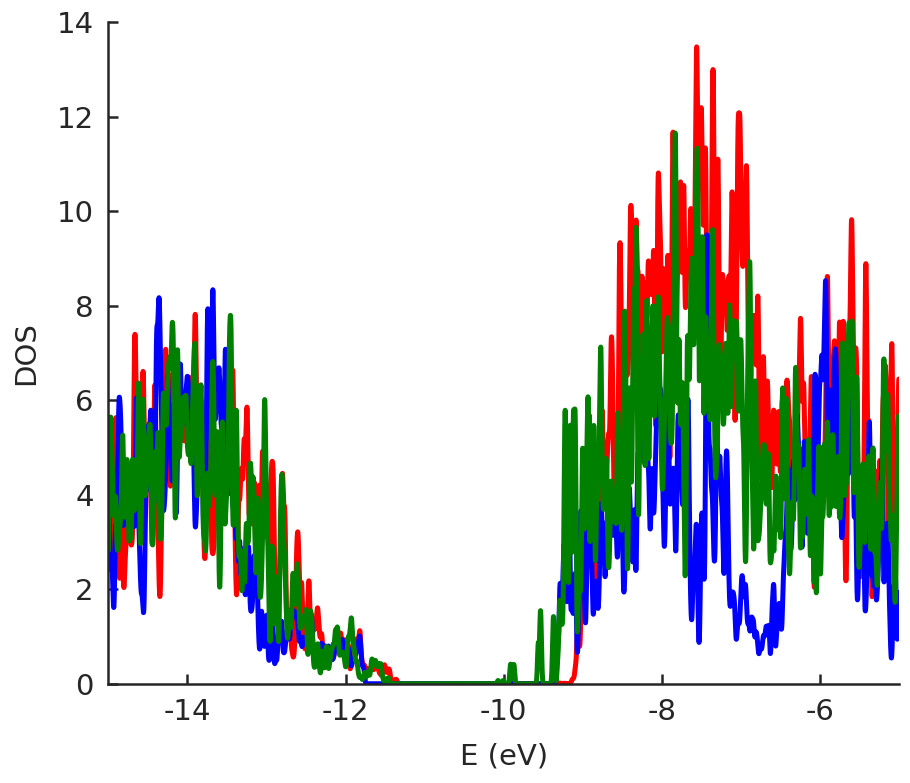

In [5]:
import pybinding as pb
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
from math import ceil, sqrt, pi, cos,exp, sin
from scipy import integrate
from scipy.optimize import minimize as minimize_scipy
import matplotlib.mlab as mlab
import matplotlib.gridspec as gs
import sys
from lmfit import Parameters, minimize
from lmfit.printfuncs import report_fit

from PTMC_TB.gamma import Stack
from PTMC_TB.materials import *
from PTMC_TB.charge import getCharges, electricfield, getpotential_direct, getpotential_ewald
import PTMC_TB.fitting as fitting
import PTMC_TB.QE_util as QE


pb.pltutils.use_style()

%matplotlib widget
plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300

kpoints = QE.get_fullband_kpoints()
points_index = QE.fullband_index

forced_a = 0.376


inse_ = InSe()
gase_ = GaSe()
gas_ = GaS()
gate_ = GaTe()


matstackgase = [gase_,gase_,gase_]
matstackinse = [gas_,gas_,gas_]
matstackhetero = [gase_,gas_,gase_]
matgase = Stack(matstackgase,0.375)
matinse = Stack(matstackinse,0.400)
mathetero = Stack(matstackhetero,0.375)
latticega = matgase.lat
latticein = matinse.lat
latticehetero = mathetero.lat
kpoints[:,0] *= pi*2/matgase.a
kpoints[:,1] *= pi*2/matgase.a
kpoints[:,2] *= pi*2/matgase.c
a=matgase.a
c=matgase.c
gamma = [0, 0, 0]
A = [0, 0, pi/c]
k = [4*pi/(3*a),0,0]
m = [pi/a,-pi/(sqrt(3)*a),0]
l = [4*pi/(3*a),0,pi/c]
h = [pi/a,-pi/(sqrt(3)*a),pi/c]

modelgase = pb.Model(
latticega,
pb.translational_symmetry()
)
solverga = pb.solver.lapack(modelgase)

modelinse = pb.Model(
latticein,
pb.translational_symmetry()
)
solverin = pb.solver.lapack(modelinse)

modelhetero = pb.Model(
latticehetero,
pb.translational_symmetry()
)
solverhetero = pb.solver.lapack(modelhetero)

QE.brillouin_highdens[:,0] *= pi*2/a
QE.brillouin_highdens[:,1] *= pi*2/a
QE.brillouin_highdens[:,2] *= pi*2/c


dosga = solverga.calc_dos_full(np.linspace(-15, -5, 20000), 0.01,QE.brillouin_highdens)  # [eV]
dosga.plot(color='red')
dosin = solverin.calc_dos_full(np.linspace(-15, -5, 20000), 0.01,QE.brillouin_highdens)  # [eV]
dosin.plot(color='blue')
doshetero = solverhetero.calc_dos_full(np.linspace(-15, -5, 20000), 0.01,QE.brillouin_highdens)  # [eV]
doshetero.plot(color='green')


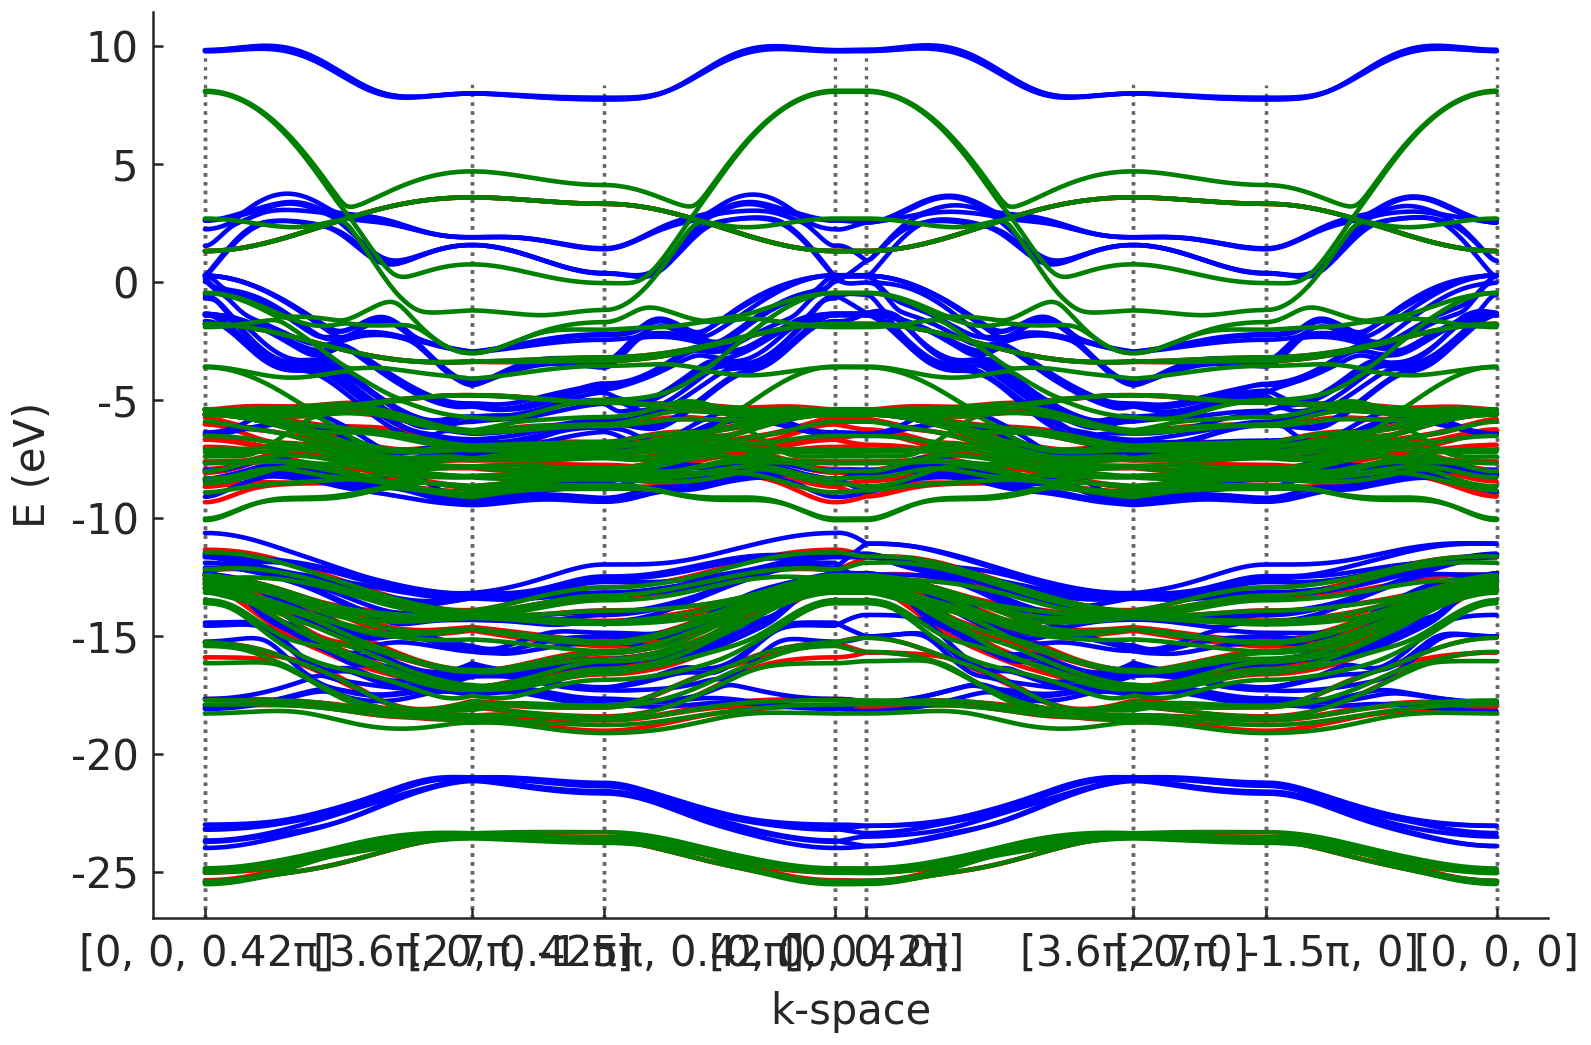

In [3]:

fig, subplot = plt.subplots()

bandsga = solverga.calc_bands(A,l,h,A,gamma,k,m,gamma)
bandsga.plot(color='red')

bandsin = solverin.calc_bands(A,l,h,A,gamma,k,m,gamma)
bandsin.plot(color='blue')

bandshetero = solverhetero.calc_bands(A,l,h,A,gamma,k,m,gamma)
bandshetero.plot(color='green')
